## **LECTURE** 19: Save and Load API Model

## **course**: Awfera Machine Learning

## **Instructor**: Dr. Shazia Saqib

## **Student**: Muhammad Shafiq

____________

## Import Required Libraries

First, let's import all the necessary libraries we'll need for this model

In [ ]:
# import necessary libraries
import pandas as np
import numpy as np
import pickle

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


### **Data Loading**

In [7]:
# load the california houseing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print("Dataset loaded successfully!")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nDataset description: ")
print(housing.DESCR[:500] + "....")

Dataset loaded successfully!
Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

Dataset description: 
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu....


### **Display basic Info**

In [8]:
print("Feature names: ")
print(X.columns.tolist())
print("\nFirst 5 rows of features(X): ")
print(X.head())
print("\nFirst 5 rows of target(y): ")
print(y.head())
print("\nBasic Statistics: ")
print(X.describe())


Feature names: 
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows of features(X): 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

First 5 rows of target(y): 
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Basic Statistics: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       

## Data Exploration and visualization


In [9]:
# check for  missing values
print("Missing values in features: ")
print(X.isnull().sum())
print(f"\nMissing values in target: {y.isnull().sum()}")

Missing values in features: 
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target: 0


In [14]:
# Basic statistics
print("\nTarget variable statistics: ")
print(f"Mean house value: ${y.mean():.2f} (in hundreds of thousands)")
print(f"median house value: ${y.median():.2f} (in hundreds of thousands)")
print(f"min house value: ${y.min():.2f} (in hundreds of thousands)")
print(f"max house value: ${y.max():.2f} (in hundreds of thousands)")


Target variable statistics: 
Mean house value: $2.07 (in hundreds of thousands)
median house value: $1.80 (in hundreds of thousands)
min house value: $0.15 (in hundreds of thousands)
max house value: $5.00 (in hundreds of thousands)


### **Visualization**

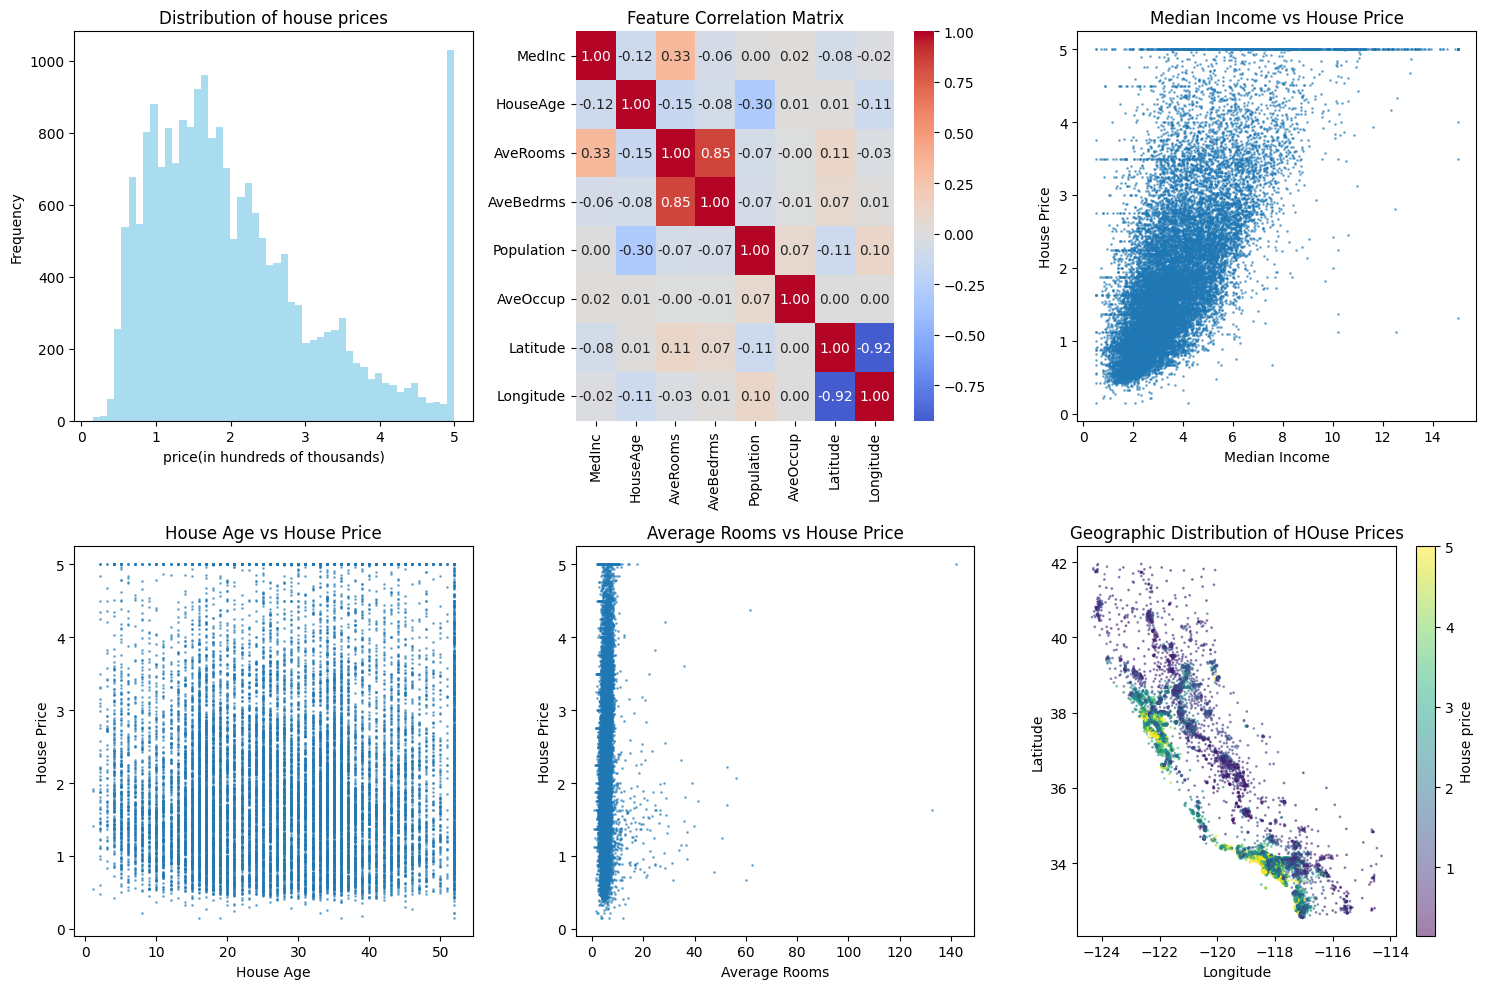

In [19]:
plt.figure(figsize=(15, 10))

# Distribution of target variable
plt.subplot(2, 3, 1)
plt.hist(y, bins=50, alpha=0.7, color='skyblue')
plt.title("Distribution of house prices")
plt.xlabel("price(in hundreds of thousands)")
plt.ylabel("Frequency")

# Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Feature Correlation Matrix")

#Scatter plot: medInc vs price
plt.subplot(2, 3, 3)
plt.scatter(X['MedInc'], y, alpha=0.5, s=1)
plt.title("Median Income vs House Price")
plt.xlabel("Median Income")
plt.ylabel("House Price")

#Scatter plot: HouseAge vs price
plt.subplot(2, 3, 4)
plt.scatter(X['HouseAge'], y, alpha=0.5, s=1)
plt.title("House Age vs House Price")
plt.xlabel("House Age")
plt.ylabel("House Price")

#Scatter plot: HouseAge vs price
plt.subplot(2, 3, 5)
plt.scatter(X['AveRooms'], y, alpha=0.5, s=1)
plt.title("Average Rooms vs House Price")
plt.xlabel("Average Rooms")
plt.ylabel("House Price")

# Geographic plot
plt.subplot(2, 3, 6)
plt.scatter(X['Longitude'],X['Latitude'], c=y, cmap='viridis', alpha=0.5, s=1)
plt.colorbar(label='House price')
plt.title("Geographic Distribution of HOuse Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()


### **Data preprocessing and cleaning**


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print("Data split completed!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"\nTest set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

Data split completed!
X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)

Training set: 16512 samples (80.0%)

Test set: 4128 samples (20.0%)


## **Standard Sscalling**

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scalling completed!")
print(f"\nOriginal X_train Statistics: ")
print(f"Mean: {X_train.mean().mean():.3f}")
print(f"std: {X_train.std().mean():.3f}")

print("\nScaled X_train statistics: ")
print(f"Mean: {X_train_scaled.mean():.3f}")
print(f"std: {X_test_scaled.std().mean():.3f}")

Feature Scalling completed!

Original X_train Statistics: 
Mean: 173.079
std: 146.263

Scaled X_train statistics: 
Mean: 0.000
std: 1.018


## **Model Training**

In [24]:
model= LinearRegression()

print("Training the Linear Regression model...")
model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"\nModel coefficients: {model.coef_}")
print(f"Model interecept: {model.intercept_:.4f}")

Training the Linear Regression model...
Model training completed!

Model coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Model interecept: 2.0719


### **Model Evaluation**

In [28]:
# Make predictions on both training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation Results: ")
print("=" * 40)
print(f"Training set: ")
print(f" Mean Squared Error: {train_mse:.4f}")
print(f" Root Mean Squared Error: {np.sqrt(train_mse):.4f}")
print(f"  R2 Score: {train_r2:.4f}")

print(f"Test set: ")
print(f" Mean Squared Error: {test_mse:.4f}")
print(f" Root Mean Squared Error: {np.sqrt(test_mse):.4f}")
print(f"  R2 Score: {test_r2:.4f}")

print(f"\nModel Performance Summary: ")
print(f"The Model expalins {test_r2*100:.1f}% of the variance in house price")
print(f"Average prediction error: ${np.sqrt(test_mse)*100:.0f}K")

Model Evaluation Results: 
Training set: 
 Mean Squared Error: 0.5179
 Root Mean Squared Error: 0.7197
  R2 Score: 0.6126
Test set: 
 Mean Squared Error: 0.5559
 Root Mean Squared Error: 0.7456
  R2 Score: 0.5758

Model Performance Summary: 
The Model expalins 57.6% of the variance in house price
Average prediction error: $75K


### **Visualizie prediction vs actual values**



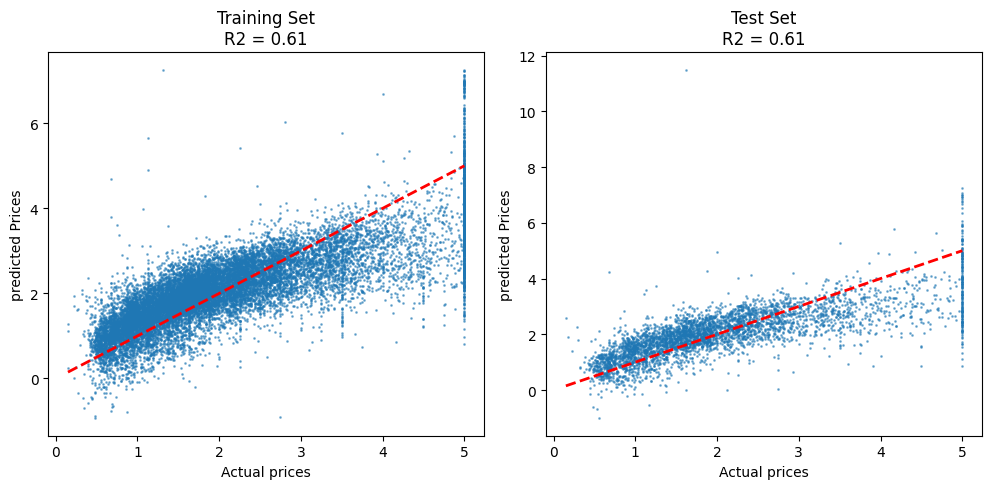

In [29]:
plt.figure(figsize=(15, 5))

# Training set predictions
plt.subplot(1,3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, s=1)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual prices')
plt.ylabel("predicted Prices")
plt.title(f"Training Set\nR2 = {train_r2:.2f}")

# test set predictions
plt.subplot(1,3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual prices')
plt.ylabel("predicted Prices")
plt.title(f"Test Set\nR2 = {train_r2:.2f}")


plt.tight_layout()
plt.show()

### **Model Saving**


In [32]:
# save the trained model using pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename,'wb') as file:
    pickle.dump(model, file)

print(f"Trained model saved to {model_filename}")    

# save the scaler as well very importtant for deployment
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler saved to {scaler_filename}")    

# verify that we can load the model back
print("\nVerifying saved files...")
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

print("Model and Scaler loaded successfully for verification..")        

Trained model saved to linear_regression_model.pkl
Scaler saved to scaler.pkl

Verifying saved files...
Model and Scaler loaded successfully for verification..


In [36]:
# Test the loaded model with a sample prediction
sample_prediction = loaded_model.predict(X_test_scaled[:1])
print(f"\nSample prediction with loaded model: ${sample_prediction[0]*100:.0f}K")
print(f"Actual value for sample: ${y_test.iloc[0]*100:.0f}K")
print(f"Prediction error: ${abs(sample_prediction[0] - y_test.iloc[0])*100: .0f}K")


Sample prediction with loaded model: $72K
Actual value for sample: $48K
Prediction error: $ 24K


### **Preparing for Deployment**

In [37]:
# create example input data for testing teh api
example_house = {
    'MedInc' : 3.8,     
    'HouseAge' :28.0,      
    'AveRooms' :5.4,     
    'AveBedrms' :1.0,    
    'Population' :3000.0,   
    'AveOccup'  :3.0,    
    'Latitude'  :34.0,    
    'Longitude' : -118.0       
}

print("Example house features for API testing")
for feature, value in example_house.items():
    print(f"   {feature}: {value}")

Example house features for API testing
   MedInc: 3.8
   HouseAge: 28.0
   AveRooms: 5.4
   AveBedrms: 1.0
   Population: 3000.0
   AveOccup: 3.0
   Latitude: 34.0
   Longitude: -118.0
